Importing tensorflow and dataset

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


# Data cleaning and preparation

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [9]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


Normalize data

In [10]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


In [15]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

# Training the model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [13]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1140 - accuracy: 0.9673
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0959 - accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0833 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0725 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0643 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9855
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9869
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.037

In [18]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 2s 5ms/step - loss: 0.0731 - accuracy: 0.9769
test set accuracy:  97.68999814987183


# Predictions

In [19]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)

313/313 [==============================] - 2s 4ms/step
shape of preds:  (10000, 10)


We probably can't go through all the 10000 predictions for now, but we can take a look at the first few. Let's plot the first few test set images along with their predicted and actual labels and see how our trained model actually performed.

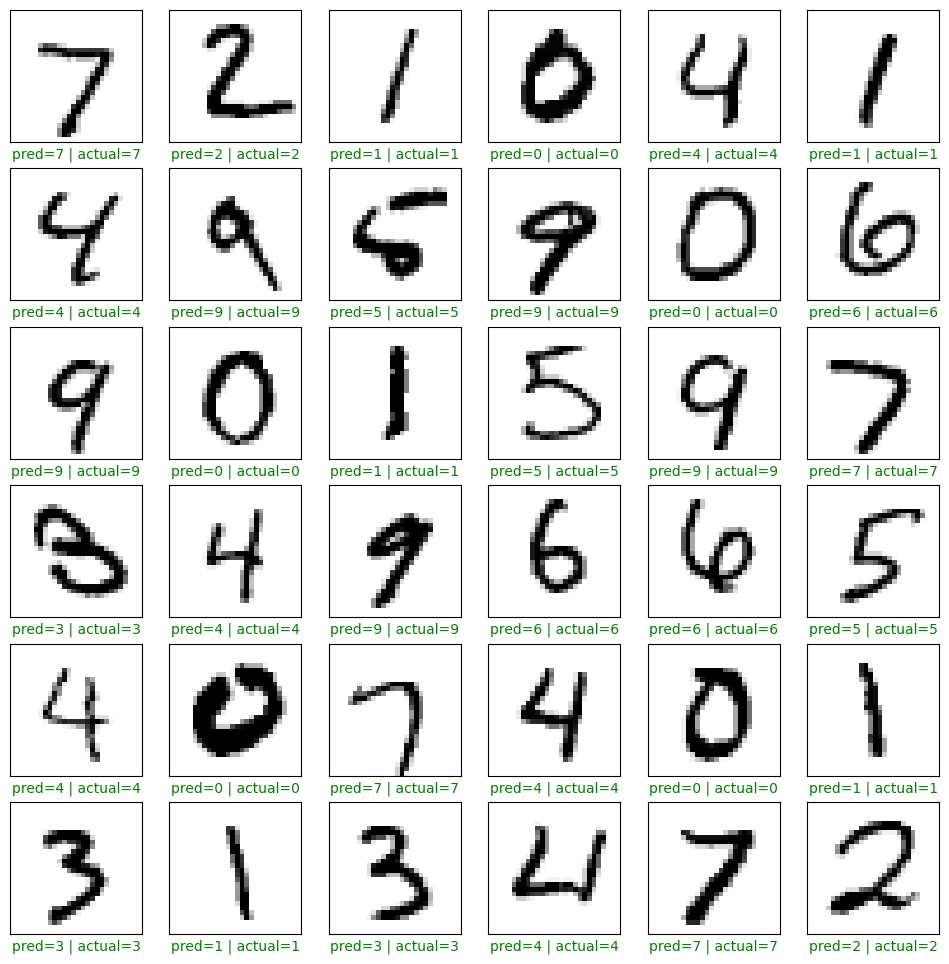

In [24]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('pred={} | actual={}'.format(pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()